## Principal Component Analysis
- Here we are going to revisit PCA and introduce some new concepts along the way

###  Uses
- Feature extraction
- Used as input into other models
- Visualization of high dimensions in lower spaces
- Examples: 
    - Can use to visualize differences in MNIST $(28\times 28)$ numbers 
    - Consider 1080p or 720p images -> millions of pixels
    - Genome $3\times 10^9$base pairs
        - Lots of data
        - Need to be able to work with high dimensional data
- Question How do we go from miliions of sequences to 2 or 3 dimensions?
    - Example: DNA sequences from Ancestry or 23AndMe

### How PCA works
- PCA is a linear transformation:
$$
Z = Q^Tx
$$
where $Z$ is the output matrix, $Q^T$ is the affine transformation and $x$ is the input
- Matrix $Q$ allows rotation and scaling of $X$
- Variance is information
    - Directions of high variability indicate most amount of information
- PCA results in orthogonal transformation of the input space
     - Linear combinatio of inputs
     - Arrange columns such that largest variaces in collumns appear first
     - Signal to Noise selection
         - Large vairations in the data are signal
         - Small variations in the data are noise
         - Select only columns such that $\sum Var_i\approx 95\%,98\%,99\%,...$ of variance

<img src="./CourseNotes/Lecture 4/pics/pca.png" />

### Derivation
- We'll derive principal components in 2 steps
    1. Calculate the empiricale covariance matrix
    2. Decompose the empiricale covariance matrix through eigen decomposition

#### Calculating the empirical covariance matrix
- Suppose we have the observation matrix $X_{N\times M}$ then
$$
\Sigma_X =\frac{1}{N}(X-\mu_X)^T(X-\mu_X)\quad;\quad \mu_X = \frac{\sum_{i=1}^N X_{ij}}{N}
$$
$\Sigma_X$ is the empricale covariance matrix and $\mu_X$ is empircale mean

#### Eigendecomposition and selection of Principal components
- By definition the eigendecomposition of the empricale covariance matrix is one such that:
$$
\Sigma_X V = V \Lambda \quad;\quad
\Lambda = 
\begin{bmatrix}
\lambda_1& 0 & \cdots & 0 \\
0& \lambda_2 & \cdots & 0 \\
\vdots&\vdots&\ddots&\vdots\\
0& 0 & \ddots & \lambda_N \\
\end{bmatrix}
$$
- By definition $V^T$ is orthogonal to $V$ which implies $V^T=V^{-1}$, which means that by multiplying equation by $V^T$ we have:
$$
\Sigma_X = V\Lambda V^{-1} = V\Lambda V^T \Leftrightarrow V^T\Sigma_XV = \Lambda
$$
- Then for some linear transformation $Z = XQ$ we have $\mu_Z = \mu_XQ$ which implies:
$$
\begin{align}
\Sigma_Z &= \frac{1}{N}(Z-\mu_Z)^T(Z-\mu_Z) = \frac{1}{N}(XQ-\mu_Z)^T(XQ-\mu_Z) \\
& = \frac{1}{N}(XQ-\mu_XQ)^T(XQ-\mu_XQ) = \frac{1}{N}Q^T(X-\mu_X)^T(X-\mu_X)Q\\
&=Q^T\Sigma_XQ
\end{align}
$$
- It follows that if $Q^TQ=I$ then 
$$
\Sigma_Z = \Lambda
$$
and $\Sigma_Z$ is our principal component matrix

#### Reconstruction error
- In unsupervised machine learning our objective function is the __reconstruction error__
- It is the function against which we "optimize" our values
- The reconstrcution error for PCA is defined as:
$$
J = \sum_n(x_n-x_{reconstructed,n})^2
$$
- The reconstuction is the loss from using our approximation
- Selecting the top $k$ eigenvalues and associated principal vectors we re-write the reconstruction error through the Frobenius norm:
$$
J = |X- Z_kQ_k^{-1}| = |X- XQ_kQ_k^T|_F^2 \quad\mbox{since } Q_k^{-1}=Q_k^T \mbox{ and } Z_k = XQ_k
$$
where $X\in \mathbb{R}^{N\times D}$ and $Q\in \mathbb{R}^{D\times K}$
- Selecting the eignevectors $Q_i$ associated with the $k$ top principal component yields the principal compnent algorithm, that is 
$$
J_min = \min_k|X-XQ_kQ_k^T|_F^2\qquad s.t. k = \lambda_1>\lambda_2>...>\lambda_k
$$
<img src="./CourseNotes/Lecture 4/pics/pca2.gif" />

In [1]:
# ---- PCA: Example ----
import keras as k
import numpy as np
from matplotlib.mlab import PCA


/home/joshuah/venv3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/joshuah/venv3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/joshuah/venv3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Limitations of PCA
- Only allows linear projections
    - Co-variance matrix is of size dxd. If $d=10^5$, then $|\Sigma|= 10^{10}$
    - __Solution__: singular value decomposition (SVD)
- PCA restricts to orthogonal vectors in feature space that minimize reconstruction error
     - __Solution__: independent component analysis (ICA) seeks directions that are statistically independent
- Assumes points are multivariate Gaussian
     - __Solution:__ Kernel PCA that transforms input data to other spaces

### Interpretation of PCA
- Two common interpretations of PCA are through
    1. Maximum variance direction - find the vectors of the PC such that the projection of the data onto this direction maximizes variances (out of all possible dimensional projections)
    2. Minimum reconstruction error - find the PC vectors such that the projection of the data onto these vectors minimizes the reconstruction error
 
<img src="./CourseNotes/Lecture 4/pics/reconstruction.png" />

- In both cases PCA provides an understanding of our data in some transformed __latent space__
- Frequently these latent spaces don't have an interpretable understanding
- Intuitively the idea of linear decomposition of our data is attractive

In [22]:
#### Eigenfaces Example ####
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# Calculate the eignefaces
eigenfaces = pca.components_.reshape((n_components, h, w))
    
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [34]:
# Visualization
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def titles(y_test, target_names):
    for i in range(target_names.shape[0]):
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'Names:{name}'.format(name = true_name)

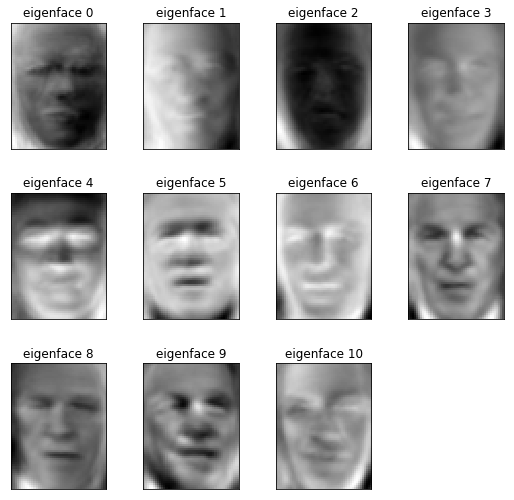

In [36]:
eigenface_titles = ["eigenface %d" % i for i in range(0,11)]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

- We can take a linear composition of these faces to generate, with 100 components we recreate the images
- As an exercise try increasing the number of PCA components

The total training loss is 109.18545532226562


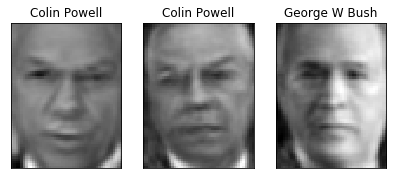

In [76]:
reconstructed_names = target_names[y_train[0:4]]
X_projected_all = pca.inverse_transform(X_train_pca)
X_projected = X_projected_all[0:4]
loss = ((X_train - X_projected_all) ** 2).mean()
plot_gallery(X_projected, reconstructed_names, h, w, n_row=1, n_col=4)
print("The total training loss is {}".format(loss))

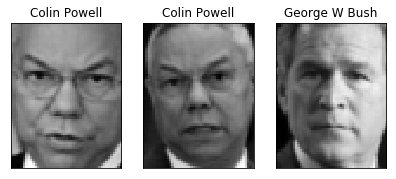

In [77]:
# True values
plot_gallery(X_train[0:12], reconstructed_names, h, w, n_row=1, n_col=4)